In [1]:
#import thư viện cần dùng cho bài toán
import pandas as pd 
import numpy as np

from sklearn.cluster import KMeans 
from sklearn import metrics

import seaborn as sns 
import plotly as py 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#đọc dữ liệu từ file csv
df = pd.read_csv("C:/Users/HOANG NAM/Desktop/data.csv")

In [3]:
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


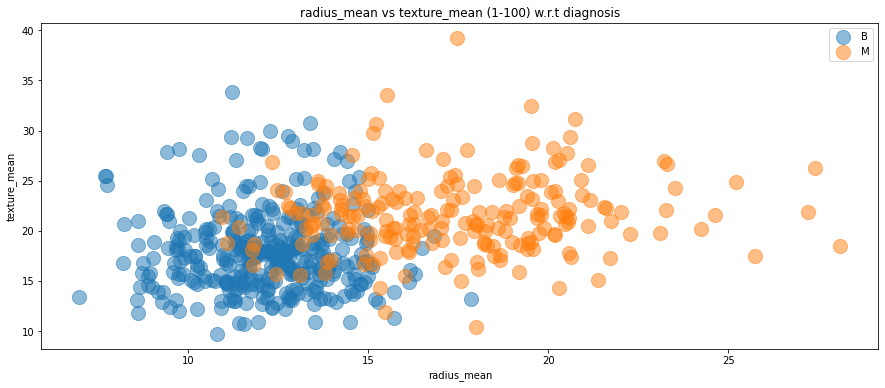

In [5]:
#Hiển thị phân bố của bán kính và kết cấu theo chuẩn đoán(M = ác tính, B = lành tính)
plt. figure(1, figsize = (15, 6)) 
for diagnosis in ['B', 'M']: 
    plt.scatter(x = 'radius_mean', y = 'texture_mean', data = df[df['diagnosis'] == diagnosis],
                s = 200, alpha = 0.5, label = diagnosis) 
plt.xlabel('radius_mean'), plt.ylabel('texture_mean') 
plt.title('radius_mean vs texture_mean (1-100) w.r.t diagnosis') 
plt.legend() 
plt.show()

In [6]:
x1 = df[['radius_mean', 'texture_mean']].iloc[:, :].values 
inertia = [] 
for n in range(1, 11):
    algorithm = KMeans (n_clusters = n, init='random') 
    algorithm.fit(x1) 
    inertia.append(algorithm.inertia_)

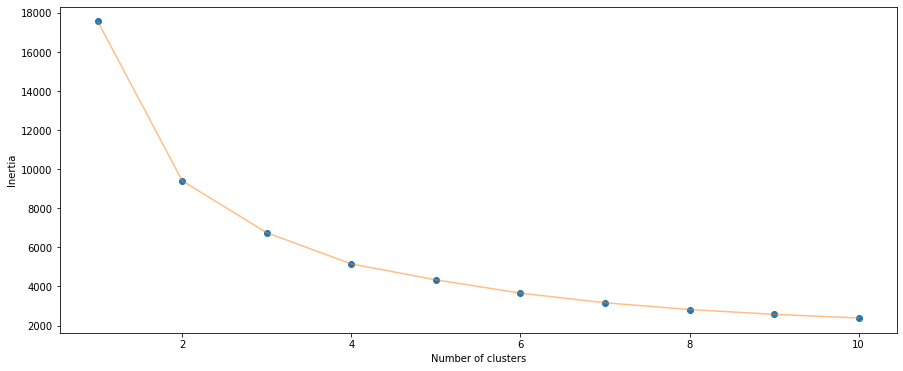

In [7]:
#Hiển thị giá trị Intertia trên biểu đồ
plt.figure(1, figsize = (15, 6)) 
plt.plot(np.arange(1, 11), inertia, 'o') 
plt.plot(np.arange(1 , 11), inertia, '-', alpha = 0.5) 
plt.xlabel('Number of clusters'), plt.ylabel('Inertia') 
plt.show()

In [8]:
# Tạo mô hình KMeans với số cụm là 3
algorithm = KMeans(n_clusters = 3, random_state = 0) 
algorithm.fit(x1) 
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

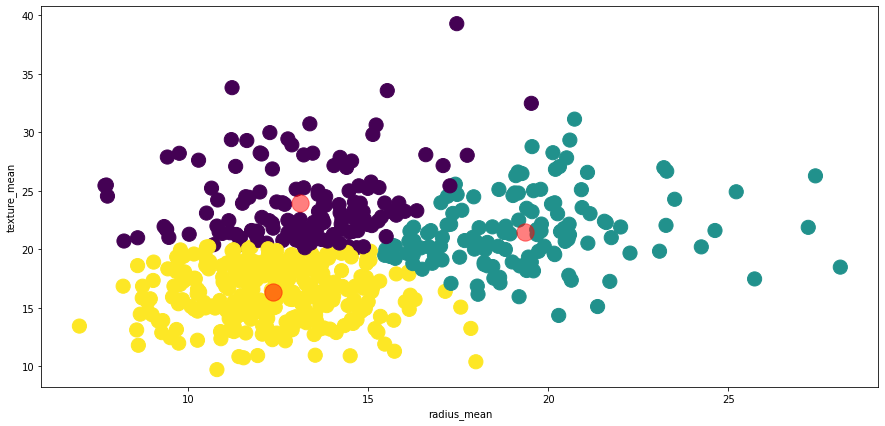

In [9]:
plt.figure(1, figsize = (15, 7)) 
plt.clf() 
plt.scatter(x = 'radius_mean', y = 'texture_mean', data = df, c = labels1,
            s = 200) 
plt.scatter(x = centroids1[:, 0], y = centroids1[: , 1], s = 300, c = 'red', alpha = 0.5) 
plt.ylabel('texture_mean'), plt.xlabel('radius_mean') 
plt.show()

In [10]:
#Hệ số dáng điệu để đánh giá kết quả gom cụm
metrics.silhouette_score(x1, labels1, metric = 'euclidean')

0.4266599257212875